# Compare Base and Finetuned Model Performance

This notebook compares the performance of the base model and the finetuned model by analyzing the evaluated domain names in `data/evaluated_dataset_gemini.json` (base model) and `data/evaluated_finetuned_dataset_gemini.json` (finetuned model).

In [26]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Datasets

In [27]:
with open('data/evaluated_dataset_gemini.json', 'r') as f:
    base_model_data = json.load(f)

with open('data/evaluated_finetuned_dataset_gemini.json', 'r') as f:
    finetuned_model_data = json.load(f)

# Flatten the data
base_model_records = []
for item in base_model_data:
    if 'evaluated_domains' in item and isinstance(item['evaluated_domains'], list):
        for domain_info in item['evaluated_domains']:
            record = {'business_description': item.get('business_description')}
            record.update(domain_info)
            base_model_records.append(record)

finetuned_model_records = []
for item in finetuned_model_data:
    if 'evaluated_domains' in item and isinstance(item['evaluated_domains'], list):
        for domain_info in item['evaluated_domains']:
            record = {'business_description': item.get('business_description')}
            record.update(domain_info)
            finetuned_model_records.append(record)

base_df = pd.DataFrame(base_model_records)
finetuned_df = pd.DataFrame(finetuned_model_records)

## Analysis and Comparison

In [28]:
base_metrics = {
    'relevance': base_df['relevance'].mean(),
    'brandability': base_df['brandability'].mean(),
    'safety': base_df['safety'].mean(),
    'valid_tld_ratio': base_df['has_valid_tld'].mean()
}

finetuned_metrics = {
    'relevance': finetuned_df['relevance'].mean(),
    'brandability': finetuned_df['brandability'].mean(),
    'safety': finetuned_df['safety'].mean(),
    'valid_tld_ratio': finetuned_df['has_valid_tld'].mean()
}

metrics_df = pd.DataFrame([base_metrics, finetuned_metrics], index=['Base Model', 'Finetuned Model'])

print("Comparison of Metrics:")
print(metrics_df)

Comparison of Metrics:
                 relevance  brandability  safety  valid_tld_ratio
Base Model        0.833333      0.786667     1.0         0.766667
Finetuned Model   0.850000      0.773333     1.0         0.933333


### Visualizing the Comparison

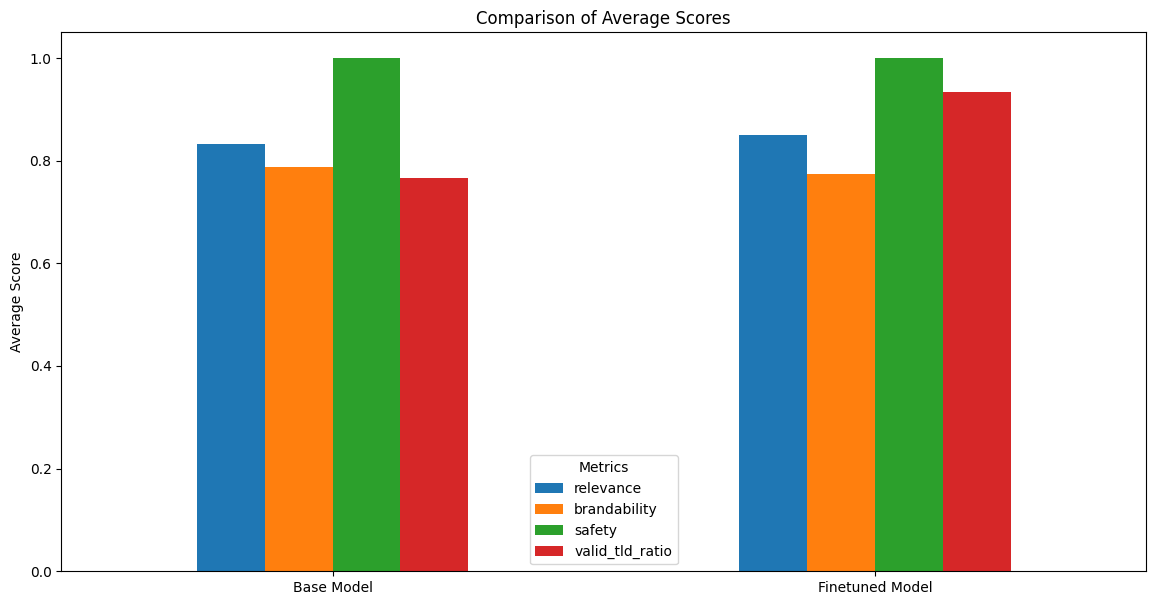

In [29]:
metrics_df.plot(kind='bar', figsize=(14, 7), rot=0)
plt.title('Comparison of Average Scores')
plt.ylabel('Average Score')
plt.legend(title='Metrics')
plt.show()